In [17]:
def depth(reconstructed,true):
    reconstructed_root=[n for n,d in reconstructed.in_degree() if d==0][0]
    true_root=[n for n,d in true.in_degree() if d==0][0]
    return len(nx.shortest_path(reconstructed.to_undirected(), reconstructed_root,true_root))
    
# Minimum Cost Heuristic 
def sum_branch_lengths(graph, source_node):
    # Compute shortest paths from the source node to all other nodes
    shortest_paths = nx.single_source_dijkstra_path_length(graph, source_node)
    
    # Sum the lengths of the shortest paths
    total_length = sum(shortest_paths.values())
    
    return total_length

def root(graph_1,graph_2):
    root_1 = [node for node, in_degree in graph_1.in_degree() if in_degree == 0]
    root_2 = [node for node, in_degree in graph_2.in_degree() if in_degree == 0]
    if root_1[0] == root_2[0]:
        return 1
    else:
        return 0
    
def minimum_heuristic(graph):
    node_list = list(graph.nodes())
    node=[]
    for i in node_list:
        heuristic=sum_branch_lengths(graph,i)
        node.append((i,heuristic))
    sorted_nodes = sorted(node, key=lambda x: x[1])

    return sorted_nodes[0][0]

# Root the tree and direct edges away from root
def direct_edges_away_from_root(graph, root):

    directed_tree = nx.DiGraph()

    # Depth First Search to traverse the tree and then point edges away from the root
    def dfs(node, parent):
        for neighbor in graph.neighbors(node):
            if neighbor != parent:
                # Reverse the edge direction
                directed_tree.add_edge(neighbor, node)
                # Recursively visit the neighbour
                dfs(neighbor, node)

    # Start DFS from the root
    dfs(root, None)
    # Reverse edges to point away rather than towards the root
    return nx.reverse(directed_tree)


In [36]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def generate_random_directed_tree(n, weight_range=(1, 1)):
    # Generate an undirected tree first
    G = nx.random_tree(n)
    
    # Convert undirected tree to directed tree from a root node
    root = random.choice(list(G.nodes()))
    D = nx.bfs_tree(G, source=root)
    
    # Assign random weights to each edge in the directed tree
    for (u, v) in D.edges():
        D.edges[u, v]['weight'] = random.randint(*weight_range)

    return D
roots=[]
depths=[]
for i in range(2,501):
    tree = generate_random_directed_tree(i,(1,1))
    nx.write_graphml(tree, f"C:/Users/Darren Zammit/Desktop/random trees/{i}.graphml")



In [37]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def generate_linear_directed_tree(n, weight_range=(1, 1)):
    # Create a path graph with n nodes
    G = nx.path_graph(n)
    
    # Convert to a directed graph, direction from node 0 to n-1
    D = nx.DiGraph([(i, i + 1) for i in range(n - 1)])
    
    # Assign random weights to each edge
    for (u, v) in D.edges():
        D.edges[u, v]['weight'] = random.randint(*weight_range)

    return D

for i in range(2,501):
    tree = generate_linear_directed_tree(i,(1,1))
    nx.write_graphml(tree, f"C:/Users/Darren Zammit/Desktop/linear trees/{i}.graphml")


In [38]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def generate_even_directed_tree(n, weight_range=(1, 1)):

    D = nx.DiGraph()
    nodes = list(range(n))

    root = nodes[0]
    D.add_node(root)

    # Assign two children to each parent node until no more nodes are available
    queue = [root]
    idx = 1  # Start adding children from the second node

    while idx < n:
        parent = queue.pop(0)
        for _ in range(2):  # Each parent has two children
            if idx >= n:
                break
            D.add_edge(parent, nodes[idx])
            D.edges[parent, nodes[idx]]['weight'] = random.randint(*weight_range)
            queue.append(nodes[idx])
            idx += 1
    return D

for i in range(2,501):
    tree = generate_even_directed_tree(i,(1,1))
    nx.write_graphml(tree, f"C:/Users/Darren Zammit/Desktop/even directed trees/{i}.graphml")


In [19]:
import networkx as nx
import os
import time

directory = 'C:/Users/Darren Zammit/Desktop/linear trees'

linear_results = []

def predict_root(graph):
    true_root=[node for node, in_degree in graph.in_degree() if in_degree == 0]
    undirected_graph=graph.to_undirected()
    start_time = time.time()
    reconstructed_root=minimum_heuristic(undirected_graph)
    end_time = time.time() 
    elapsed_time = end_time - start_time
    return len(nx.shortest_path(undirected_graph, true_root[0],reconstructed_root))-1,elapsed_time,len(undirected_graph.nodes())
    

for i in range(2, 501):  
    file_path = os.path.join(directory, f'{i}.graphml')
    if os.path.exists(file_path):
        G = nx.read_graphml(file_path)
        
        result = predict_root(G)
        
        linear_results.append(result)


In [20]:
import networkx as nx
import os
import time

directory = 'C:/Users/Darren Zammit/Desktop/even directed trees'

even_results = []

def predict_root(graph):
    true_root=[node for node, in_degree in graph.in_degree() if in_degree == 0]
    undirected_graph=graph.to_undirected()
    start_time = time.time()
    reconstructed_root=minimum_heuristic(undirected_graph)
    end_time = time.time() 
    elapsed_time = end_time - start_time
    return len(nx.shortest_path(undirected_graph, true_root[0],reconstructed_root))-1,elapsed_time,len(undirected_graph.nodes())
    

for i in range(2, 501):  
    file_path = os.path.join(directory, f'{i}.graphml')
    if os.path.exists(file_path):
        G = nx.read_graphml(file_path)
        
        result = predict_root(G)
        
        even_results.append(result)


In [21]:
import networkx as nx
import os
import time

directory = 'C:/Users/Darren Zammit/Desktop/random trees'

random_results = []

def predict_root(graph):
    true_root=[node for node, in_degree in graph.in_degree() if in_degree == 0]
    undirected_graph=graph.to_undirected()
    start_time = time.time()
    reconstructed_root=minimum_heuristic(undirected_graph)
    end_time = time.time() 
    elapsed_time = end_time - start_time
    return len(nx.shortest_path(undirected_graph, true_root[0],reconstructed_root))-1,elapsed_time,len(undirected_graph.nodes())
    

for i in range(2, 501):  
    file_path = os.path.join(directory, f'{i}.graphml')
    print(i)
    if os.path.exists(file_path):
        G = nx.read_graphml(file_path)
        
        result = predict_root(G)
        
        random_results.append(result)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

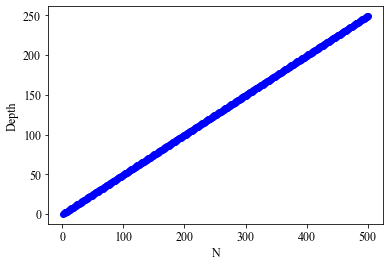

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Unpacking the tuples
depth, time, nodes = zip(*linear_results)

# Fit a cubic polynomial
coefficients = np.polyfit(nodes, time, 3)
model = np.poly1d(coefficients)

time_pred = model(nodes)


plt.scatter(nodes, depth, color='blue')
plt.xlabel('N')
plt.ylabel('Depth')

plt.rcParams.update({
    'font.size': 12,
    'font.family': 'Times New Roman'
})
plt.show()


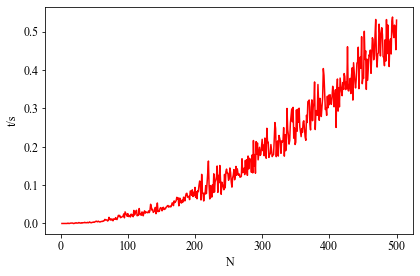

In [48]:
plt.plot(nodes, time, color='red',)
#plt.plot(nodes, time_pred, color='blue', label='Fitted Cubic Model')  
plt.xlabel('N')
plt.ylabel('t/s')

plt.tight_layout()  

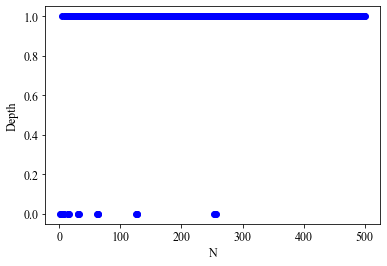

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

depth, time, nodes = zip(*even_results)


# Fit a cubic polynomial
coefficients = np.polyfit(nodes, time, 3)
model = np.poly1d(coefficients)

# Generate y values based on the model for plotting
time_pred = model(nodes)

plt.scatter(nodes, depth, color='blue')
plt.xlabel('N')
plt.ylabel('Depth')


plt.show()

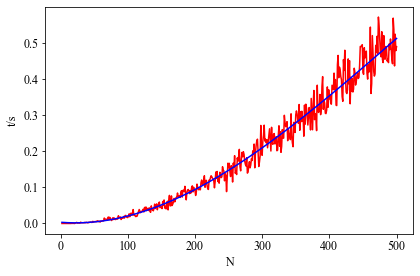

In [37]:
plt.plot(nodes, time, color='red',)
plt.plot(nodes, time_pred, color='blue', label='Fitted Cubic Model')  
plt.xlabel('N')
plt.ylabel('t/s')

plt.tight_layout()  

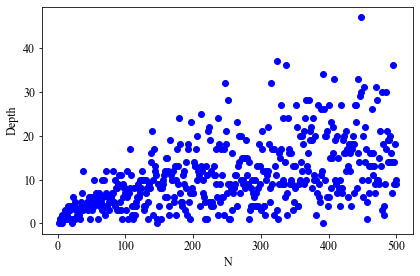

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Unpack the tuples
depth, time, nodes = zip(*random_results)


# Fit a cubic polynomial
coefficients = np.polyfit(nodes, time, 3)
model = np.poly1d(coefficients)

# Generate y values based on the model for plotting
time_pred = model(nodes)

plt.scatter(nodes, depth, color='blue')
plt.xlabel('N')
plt.ylabel('Depth')


# Show the plots
plt.tight_layout()  # Adjust the layout to make sure there's no overlap
plt.show()

Text(0, 0.5, 't/s')

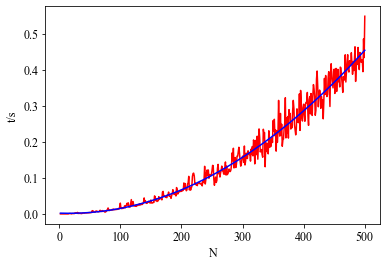

In [45]:
plt.plot(nodes, time, color='red',)
plt.plot(nodes, time_pred, color='blue', label='Fitted Cubic Model')  # Fitted model
plt.xlabel('N')
plt.ylabel('t/s')